# Vector Data Formats

## Intro
Vector data is made up of discrete geographic locations stored as (x, y) values, aka vertices. The organization of vertices determines the type of vector data.
* Points are defined by a single (x, y) value. eg. the location of a single tree.
* Lines are at least two linked vertices. eg. the path of a stream.
* Polygons are three or more linked vertices that are closed. eg. a lake.

## Formats
<dl>Shapefiles .shp</dl>
<dd> Only one type (point, line, polygon) may be stored in a shapefile. Partially open. Developed by ESRI.</dd>
<dl>GeoJSON .geojson</dl>
<dd>Features include points, lines, polygons, and multipart collections of these types. Open.</dd>

In [1]:
# Import packages
import os

import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [3]:
# Download the data and set working directory
# et.data.get_data(
    # url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip')
# Raises Error BadZipFile
# Path name does not match.

# Set working directory - earthpy creates earth-analytics for you in your home dir
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [8]:
coastlines_url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/physical/ne_50m_coastline.zip"
# Raised Error BadZipFile
# et.data.get_data(url=coastlines_url)

coastlines_path = os.path.join("data", "earthpy-downloads",
                               "ne_50m_coastline",
                               "ne_50m_coastline.shp")

coastlines = gpd.read_file(coastlines_path)
coastlines.head()

,scalerank,featurecla,min_zoom,geometry
0,0,Coastline,1.5,"LINESTRING (180.00000 -16.15293, 179.84814 -16..."
1,0,Coastline,4.0,"LINESTRING (177.25752 -17.05420, 177.28740 -17..."
2,0,Coastline,4.0,"LINESTRING (127.37266 0.79131, 127.35381 0.847..."
3,0,Coastline,3.0,"LINESTRING (-81.32231 24.68506, -81.42007 24.7..."
4,0,Coastline,4.0,"LINESTRING (-80.79941 24.84629, -80.83887 24.8..."


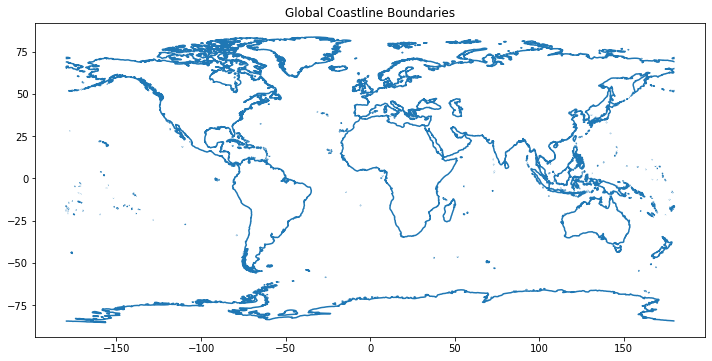

In [9]:
# Plot the data
f, ax1 = plt.subplots(figsize=(12, 6))
coastlines.plot(ax=ax1)

# Add a title to your plot
ax1.set(title="Global Coastline Boundaries")
plt.show()

In [10]:
# Is the geometry type point, line or polygon?
coastlines.geom_type

0       LineString
1       LineString
2       LineString
3       LineString
4       LineString
           ...    
1423    LineString
1424    LineString
1425    LineString
1426    LineString
1427    LineString
Length: 1428, dtype: object

In [11]:
coastlines.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   scalerank   1428 non-null   int64   
 1   featurecla  1428 non-null   object  
 2   min_zoom    1428 non-null   float64 
 3   geometry    1428 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 44.8+ KB


In [13]:
# Open a second layer
# et.data.get_data(
    # url='https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_populated_places_simple.zip')
# Error BadZipFile


# Create a path to the populated places shapefile
populated_places_path = os.path.join("data", "earthpy-downloads",
                                     "ne_50m_populated_places_simple",
                                     "ne_50m_populated_places_simple.shp")

cities = gpd.read_file(populated_places_path)
cities.head()

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,...,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,...,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,...,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,...,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,Campobasso,0,0,...,50762,50762,0.0,8,8,None,None,7.0,1159117283,POINT (14.65600 41.56300)
4,10,1,3,Admin-1 region capital,Aosta,None,None,Aosta,0,0,...,34062,34062,0.0,7,7,None,None,7.0,1159117361,POINT (7.31500 45.73700)


## Challenge 1
What is the geometry type of the `cities` object?

In [14]:
cities.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1246    Point
1247    Point
1248    Point
1249    Point
1250    Point
Length: 1251, dtype: object

The `cities` object contains data with point geometry, a single (x, y) value for each data item.